In [1]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.26
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="auto",
		project_name="deep_autoviml", keras_options={}, model_options={}, 
		save_model_flag=True, use_my_model='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


import tensorflow as tf
import optuna
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout, BatchNormalization, GaussianNoise
from storm_tuner import Tuner
from tensorflow import keras

In [2]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [3]:
# download dataset from Kaggle: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv
datapath = 'C:/Users/Ram/Documents/Ram/Data_Sets/'
sep = ','
filename = 'NLP_small.csv'
df = pd.read_csv(datapath+filename,sep=sep)
target = 'Sentiment'
print(df.shape)
df.head(1)

(499, 4)


,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2


In [4]:
df[target].value_counts()

2    305
3    158
1     35
0      1
Name: Sentiment, dtype: int64

In [5]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 350, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }
cat_vocab_dict = {}
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = datapath+filename

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 350
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
    Modified column names to fit no-spaces-in-column-names Rule in Tensorflow!
    Model type is Multi_Classification and Single_Label problem
Loaded a small data sample of size = (499, 4) into pandas dataframe to analyze...
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V 

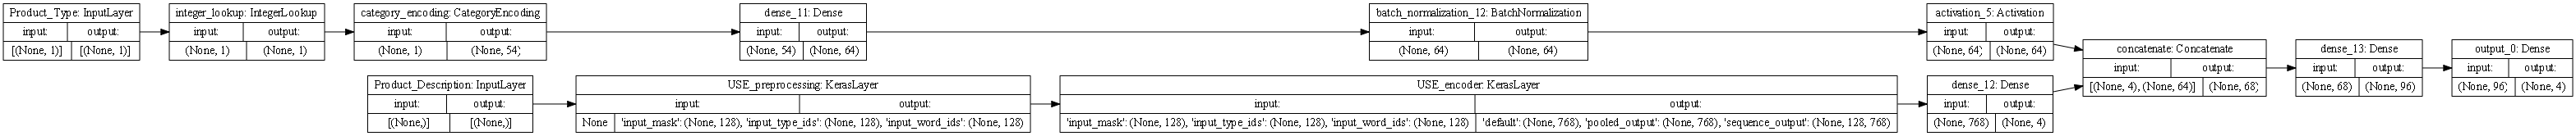

Model plot saved in file: deep_autoviml_churn_1_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {2: 1.0, 1: 1.0, 3: 1.0, 0: 4.3154861108656375}
    original datasize = 10000, initial batchsize = 10
    recommended steps per epoch = 40
    default initializer = lecun_normal, default activation = selu
    Using optimizer = Adam obj
    Tensorboard log directory can be found at: deep_autoviml\mylogs
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
    number of epochs = 350, steps per epoch = 15
    Splitting train into two: train and validation data
    Splitting validation into two: valid and heldout data
 Shuffle size = 100000
Training USE model now. This will take time...
Ep

In [ ]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

In [ ]:
filename = 'NLP_small.csv'
testfile = datapath+filename

In [ ]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)

In [ ]:
test = pd.read_csv(testfile)
predictions[0][:5]

In [ ]:
predictions[1][:5]

In [ ]:
test[target].values[:5]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))
#print(np.sqrt(mean_squared_error(test[target].values,predictions[0])))